Text Classifier
=

<br>

# 1. 목표 및 의의
## 1) 로이터 뉴스 데이터에 대해 이해해본다.
## 2) F1 score와 confusion matirx를 출력할 수 있다.
## 3) 머신러닝 모델에 따른, 단어장의 단어 개수에 따른 성능을 확인해본다.
<br><br>

# 2. 코드

In [1]:
from tensorflow.keras.datasets import reuters

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


2021-12-27 11:45:09.242941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-27 11:45:09.243154: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test,y_test) = reuters.load_data(num_words=10000, test_split=0.2)


In [3]:
print(f'훈련 샘플의 수: {len(x_train)}')
print(f'훈련 테스트의 수: {len(x_test)}')


훈련 샘플의 수: 8982
훈련 테스트의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0],y_test[0])

3 3


In [6]:
num_classes = max(y_train)+1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 각각 데이터의 길이를 50을 기본단위로 끊어서 히스토그램을 그려보겠습니다.

훈련용 뉴스의 최대 길이 : 2376
평균길이 : 145.5398574927633


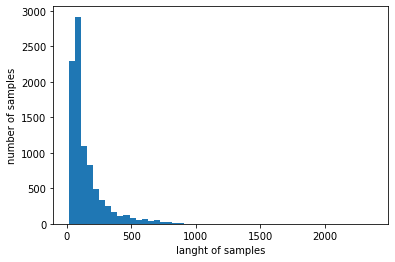

In [7]:
print('훈련용 뉴스의 최대 길이 : {}'.format(max(len(i) for i in x_train)))
print('평균길이 : {}'.format(sum(len(i) for i in x_train)/len(x_train)))

plt.hist([len(s) for s in x_train],bins=50)
plt.xlabel('langht of samples')
plt.ylabel('number of samples')
plt.show()

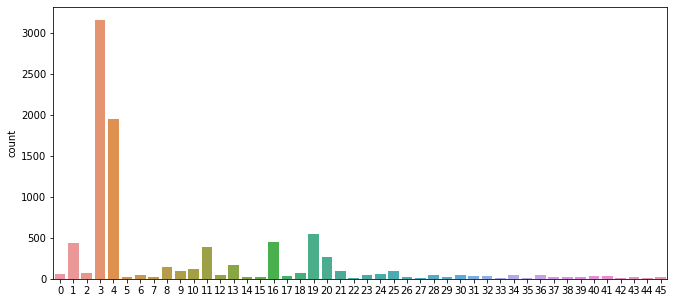

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

### 그래프 그리는 코드가 마냥 쉽지마는 않군요.

In [9]:
unique_elements, count_elements = np.unique(y_train,return_counts=True)
print("각 클래스 빈도수:")
for i in zip(unique_elements, count_elements):
    print(*i,end='\t')

각 클래스 빈도수:
0 55	1 432	2 74	3 3159	4 1949	5 17	6 48	7 16	8 139	9 101	10 124	11 390	12 49	13 172	14 26	15 20	16 444	17 39	18 66	19 549	20 269	21 100	22 15	23 41	24 62	25 92	26 24	27 15	28 48	29 19	30 45	31 39	32 32	33 11	34 50	35 10	36 49	37 19	38 19	39 24	40 36	41 30	42 13	43 21	44 12	45 18	

In [10]:
word_idx = reuters.get_word_index()
print('path="reuters_word_index"가 default로 되어있죠~')

path="reuters_word_index"가 default로 되어있죠~


In [11]:
word_idx['the']

1

In [12]:
word_idx['it']

13

### 여기서 the와 it은 실제로는 4, 16의 인덱스를 가지고 있지만, 3이 뺀만큼이 들어있습니다. 아마 Start, End, OOV 토큰 세개가 추가되어 있기때문이 아닐까요? 무튼 이건 로이터 뉴스 데이터가 정의한 일종의 약속이라고 합니다.

In [13]:
index2word = {index+3:word for word,index in word_idx.items()}


### 이렇게 하면 이제 위의 숫자로만 된 데이터를 원복 할 수 있습니다.

In [14]:
print(index2word[4], index2word[16])

the it


### 0번, 1번, 2번은 사실 각각 \<pad>, \<sos>, \<unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [15]:
index2word[0] = '<pad>'
index2word[1] = '<sos>'
index2word[2] = '<unk>'


In [16]:
print(' '.join(index2word[i] for i in x_train[0]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [17]:
print(' '.join(index2word[i] for i in [4, 587, 23, 133, 6, 30, 515]))

the transaction is expected to be completed


In [18]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index2word[j] for j in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [19]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index2word[j] for j in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [20]:
print(x_train[:1],x_test[:1])

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'] ['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital pro

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
print('이렇게 해야죠!')

이렇게 해야죠!


In [22]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [23]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


### 이제 사용할 라이브러리 들을 불러와보겠습니다.

### 나이브 베이지 분류기를 사용할 것입니다.

In [24]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB # 다항분포 나이브 베이즈 모델과 모르는 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score # 정확도 계산


In [25]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [83]:
# 테스트 데이터(텐서)를 DTM으로 만들어 줍니다.
print(f'sentence[1]: \n {x_test[1].split()[:5]}')
x_test_dtm = dtmvector.transform(x_test)
hi = x_test_dtm[1].toarray()
print(f'DTM: \n {hi[0,:50]}', type(x_test_dtm))
# TF-IDF행렬로 변환합니다.
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 
print(f'TF-IDF: \n {tfidfv_test[1,:5]}', type(tfidfv_test))
# 테스트 데이터를 예측합니다.
predicted = model.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

sentence[1]: 
 ['<sos>', 'philippine', 'sugar', 'production', 'in']
DTM: 
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] <class 'scipy.sparse.csr.csr_matrix'>
TF-IDF: 
   (0, 1)	0.0491724570182046 <class 'scipy.sparse.csr.csr_matrix'>
정확도: 0.6567230632235085


### 보다시피 중간의DTM와 TF-IDF행렬은 새악보다 상당히 희소행렬인 것을 알 수 있습니다. 사실 눈으로 볼 수 있게 출력한 값에 0이 아닌 값 5도 \<unk>토큰의 결과인 것을 쉽게 예상할 수 있습니다. 오히려 이러한 희소벡터의 성격을 지니고 있기 때문에, 문서의 성격을 분류 할 수 있는 것이라는 생각도 듭니다. 문서마다 가진 단어들이 다르기 때문입니다.
### 46개라는 상당히 많은 클래스에도 상당한 분류를 해주고 있다는 생각이 듭니다.

In [85]:
print(x_test[3], '>> label:', y_test[3])

<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3 >> label: 4


### 위 출력결과를 보면, 위 글에 대한 라벨이 4임을 확인 할 수 있습니다.
### 모델은 어떻게 예측하고 있을까요?


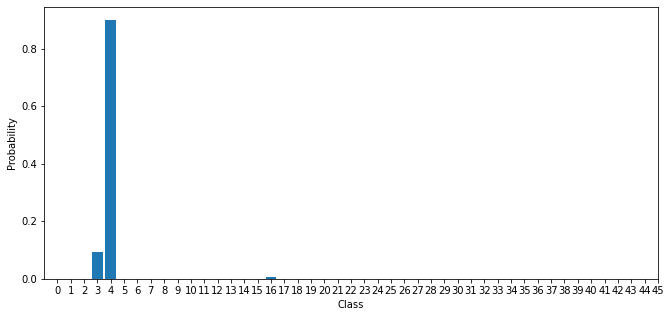

In [86]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1,21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [87]:
model.predict(tfidfv_test[3])

array([4])

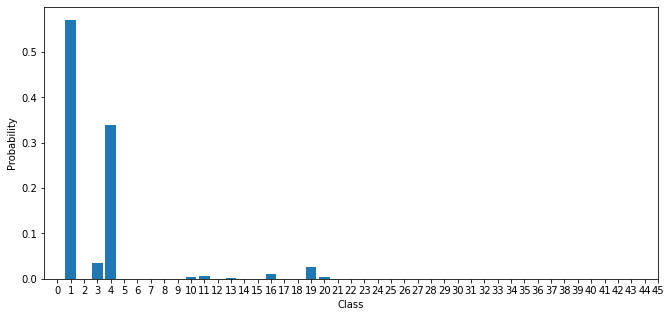

5


In [90]:
probability_10 = model.predict_proba(tfidfv_test[10])[0]
plt.bar(model.classes_, probability_10)
plt.xlim(-1,40)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()
print(y_test[10])


In [91]:
from sklearn.metrics import classification_report, confusion_matrix


In [92]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

### 이렇게 볼 수 있는데, 조금 아쉬운 결과라는 생각이 드는군요.
### precision을 통해, 현재 모델이 예측한 결과가 얼마나 맞는지 확인할 수 있고, recall을 통해, 해당 클래스의 개수중에 몇개나 식별해 내었는지 확인할 수 있습니다.
### 최종 결과의 의미는 다음과 같습니다.
### macro: 단순평균
### weighted: 각 클래스에 속하는 표본의 개수로 가중평균(기댓값)
### accuracy: 전체 예측치에서 맞춘 개수의 비율
### 이렇게 놓고 봤을 때, 꽤 많이 잘 맞추었다는 생각도 들지만, 일부 분야에서는 성능을 발휘할 수 없다는 생각이 듭니다.

In [98]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(16,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('label')
    plt.xlabel('predicted value')




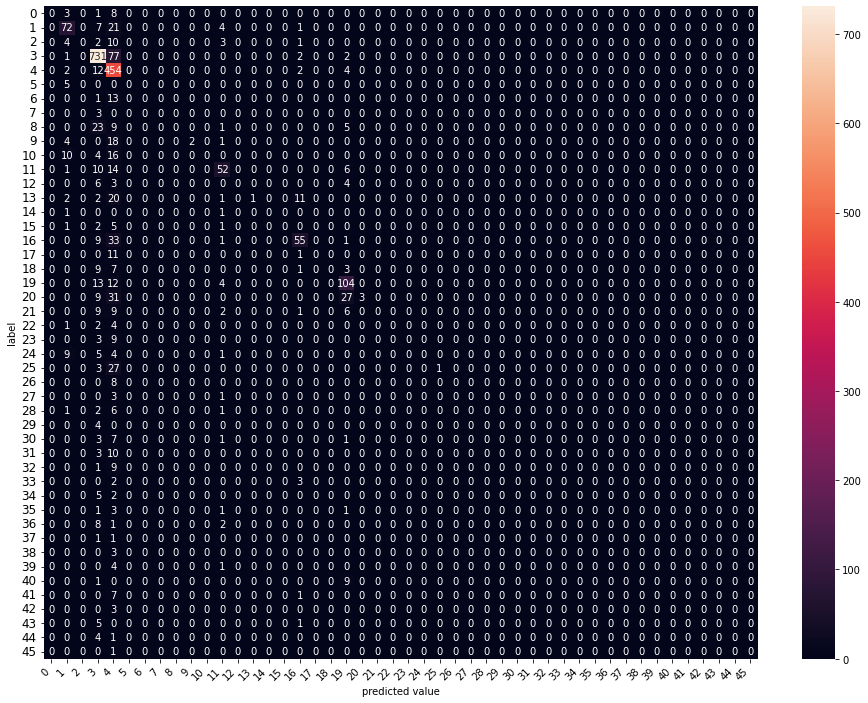

In [99]:
graph_confusion_matrix(model, tfidfv_test, y_test)

### 이렇게 보니, 라벨의 불균형이 상당한 편이며, 왜 이런 결과가 나왔는지 조금은 알 것 같습니다. 원래는 데이터의 편향도 고려하고 학습을 해야하는 것이지만, 저희는 그냥 진행했기 때문에, 특정 데이터만 더 열심히 검출하는 모델이 만들어졌습니다. 특정 데이터만 더 많이 학습했기 때문이죠. 때문에, 위 그림의 대부분이 검은색으로 보입니다.

### 이렇게 만들었던, 나이브 베이지안 분류기는 66%정도의 정확도를 보였습니다. 더 좋은 성능을 얻을 수 있도록 여러가지 모델을 확인해보겠습니다.

## Complement Naive Bayes Classifier(CNB)
### 이제 데이터 불균형 문제를 해결해보겠습니다.


In [176]:
cb = ComplementNB(alpha=0.1,norm=True)
cb.fit(tfidfv, y_train)

ComplementNB(alpha=0.1, norm=True)

In [177]:
cb_predicted = cb.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, cb_predicted))

정확도: 0.7871772039180766


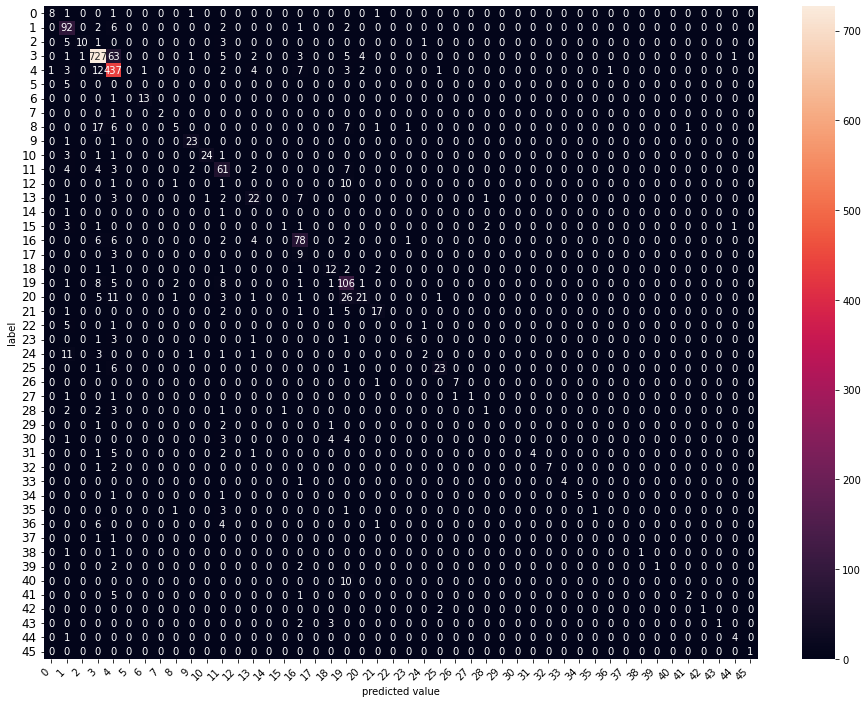

In [102]:
graph_confusion_matrix(cb, tfidfv_test, y_test)

### 와...!! 아까보다 훨씬 잘하고 있는데, 이게 77%..??
### 하긴 실용적으로 쓰려면, 99% 되어야하는 걸까요?
### 라벨이 어떻게 데이터를 나누고 있는건지 알아야 평가를 할 수 있을 것 같아요.

## 로지스틱 회귀(Logistic Regression)
### 로지스틱 회귀를 해본다고는 하는데... 지금까지 한게 로지스틱 회귀 아닌가...? 싶네요;; 그래도 따라서 해보겠습니다.
### 
<!---- 사실 위에서 한 방식이 어떤건지 정확하게 모르겠네요. 베이지안 정리를 기반으로.... --->

In [124]:
lr = LogisticRegression(C=20, n_jobs=4, penalty='l2',)
lr.fit(tfidfv, y_train)

/home/hchang/Working/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, n_jobs=4)

In [125]:
lr_predicted = lr.predict(tfidfv_test)
print('정확도:', accuracy_score(y_test, lr_predicted))

정확도: 0.8130008904719501


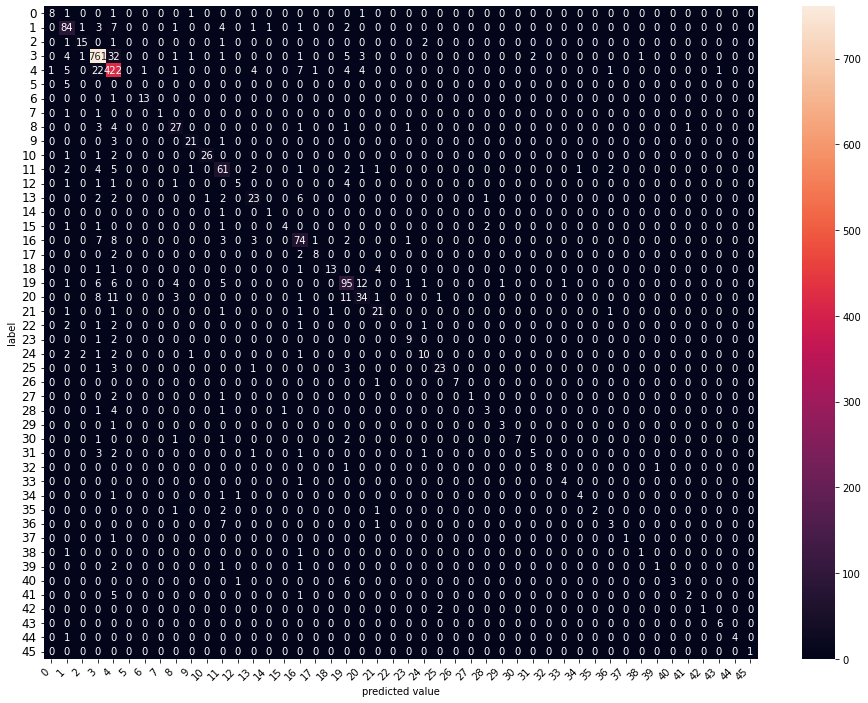

In [126]:
graph_confusion_matrix(lr, tfidfv_test, y_test)

In [143]:
lsvc = LinearSVC(C=100, penalty='l2', max_iter=500, dual=False,)
lsvc.fit(tfidfv, y_train)

LinearSVC(C=100, dual=False, max_iter=500)

In [144]:
lsvc_predicted = lsvc.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, lsvc_predicted))

정확도: 0.8023152270703473


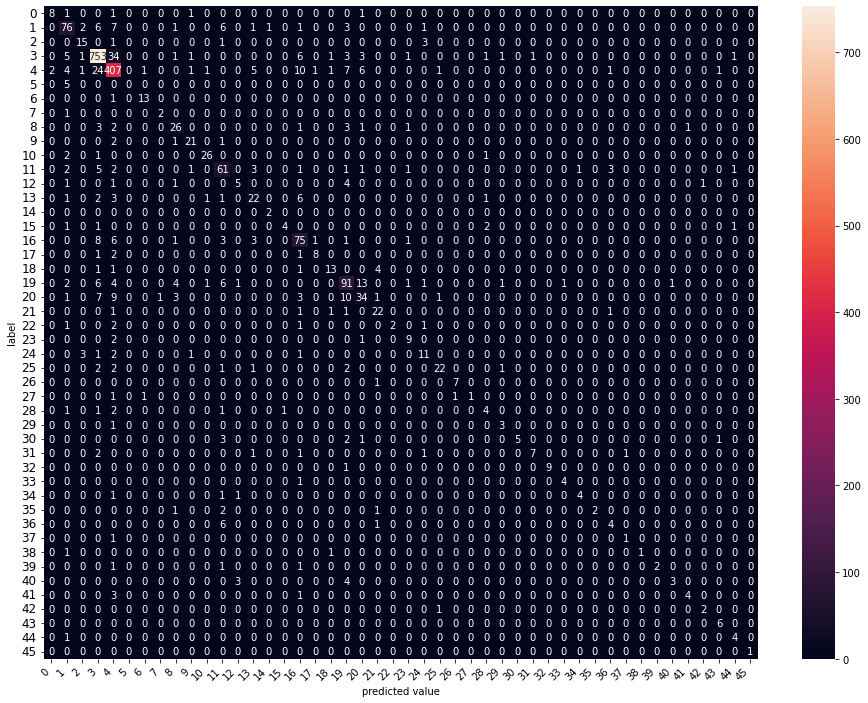

In [145]:
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

In [150]:
tree = DecisionTreeClassifier(max_depth=None, random_state=42)
tree.fit(tfidfv, y_train)


DecisionTreeClassifier(random_state=42)

In [151]:
tr_predicted = tree.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, tr_predicted))

정확도: 0.6967943009795191


In [156]:
forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30)
forest.fit(tfidfv, y_train)

for_predicted = forest.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, for_predicted))

정확도: 0.7439893143365984


### tree계열의 분류기 들은 이렇게 차원이 큰 데이터에 대해서는 충분히 잘 구분해주지 못합니다. 하지만, 그럼에도 어느정도 괜찮은 분석을 하고 있군요:)

In [159]:
grbt = GradientBoostingClassifier(random_state=42, max_depth=5) # verbose=3 이걸 추가하면, 실시간 진행이 어떤지 까지 볼 수 있다.
grbt.fit(tfidfv, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


In [161]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=30, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=4)
voting_classifier.fit(tfidfv, y_train)

vote_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, vote_predicted)) #예측값과 실제값 비교

/home/hchang/Working/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8040961709706145


In [179]:
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
cb = ComplementNB(alpha=0.1,norm=True)
lr = LogisticRegression(C=20, n_jobs=4, penalty='l2')
# grbt = GradientBoostingClassifier(random_state=42, max_depth=5) # verbose=3 이걸 추가하면, 실시간 진행이 어떤지 까지 볼 수 있다.
lsvc = make_pipeline(CalibratedClassifierCV(LinearSVC(C=100, penalty='l2', max_iter=500, dual=False)))

my_vote_classifier = VotingClassifier(estimators=[
    ('lr', lr),
    ('cb',cb),
    ("lsvc",lsvc)
], voting='soft', n_jobs=4)
my_vote_classifier.fit(tfidfv, y_train)

myvote_predicted = my_vote_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, myvote_predicted)) #예측값과 실제값 비교

/home/hchang/Working/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8125556544968834


### 학습되어있는 것을 넣어서 바로 사용할 수는 없군요... 왜일까요? 무튼 좋은 결과 나왔던 내용을 기준으로 내용을 바꿔서 넣어봤습니다.

In [180]:
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
cb = ComplementNB(alpha=0.1,norm=True)
lr = LogisticRegression(C=20, n_jobs=4, penalty='l2')
grbt = GradientBoostingClassifier(random_state=42, max_depth=5) # verbose=3 이걸 추가하면, 실시간 진행이 어떤지 까지 볼 수 있다.
lsvc = make_pipeline(CalibratedClassifierCV(LinearSVC(C=100, penalty='l2', max_iter=500, dual=False)))
forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30)

my_vote_classifier = VotingClassifier(estimators=[
    ('lr', lr),
    ('cb',cb),
    ('grbt', grbt),
    ("lsvc",lsvc),
    ("forest", forest)
], voting='soft', n_jobs=4)
my_vote_classifier.fit(tfidfv, y_train)

myvote_predicted = my_vote_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, myvote_predicted)) #예측값과 실제값 비교

/home/hchang/Working/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8161175422974176


# 3. 회고

## 1) 지금 80%만 해도 상당히 잘 맞춰주고 있지만, 여러 80%정도 되는 분류기로 앙상블 에버리징을 해봤지만, 큰 차이가 없는 모습이 나타난다. 아마 다들 틀리는 요소가 비슷한 것 같다.
## 2) 머신러닝 기반으로 분류하면 조금 더 좋은 결과를 얻을 수 있는 것일지 궁금하다. 어서 해보고싶다.
